# Data Preprocessing for Student Performance Analysis
This notebook handles loading the dataset, cleaning data, handling missing values, and feature engineering.


In [25]:
# Install seaborn
!pip install seaborn --quiet


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [27]:
from google.colab import files

# Upload original dataset
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

print("Data preview:")
display(df.head())
df.info()
df.describe(include='all')
df.isnull().sum()


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (1).csv
Data preview:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [28]:
# Convert blank strings to NaN
df.replace([" ", ""], np.nan, inplace=True)

# Fill numeric NaN with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical NaN with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled. Null counts:")
print(df.isnull().sum())


Missing values handled. Null counts:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


/tmp/ipython-input-674067130.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [29]:
# One-hot encode categorical columns to see numeric version (optional)
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded dataframe preview:")
display(df_encoded.head())


Encoded dataframe preview:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [30]:
# Save cleaned dataset for Notebook 2 / Streamlit
df.to_csv("StudentPerformanceFactors_Cleaned.csv", index=False)
files.download("StudentPerformanceFactors_Cleaned.csv")
print("Cleaned CSV saved and ready to download!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned CSV saved and ready to download!


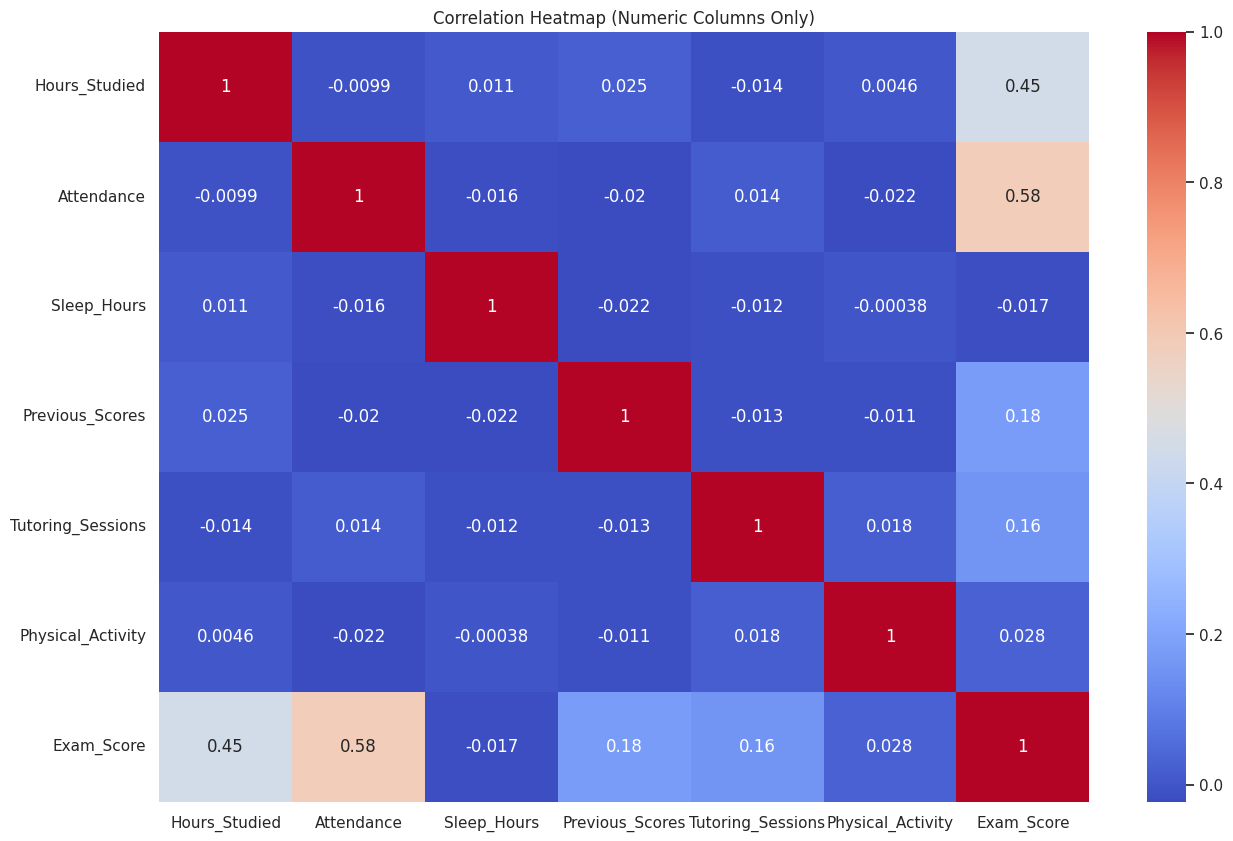

In [31]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


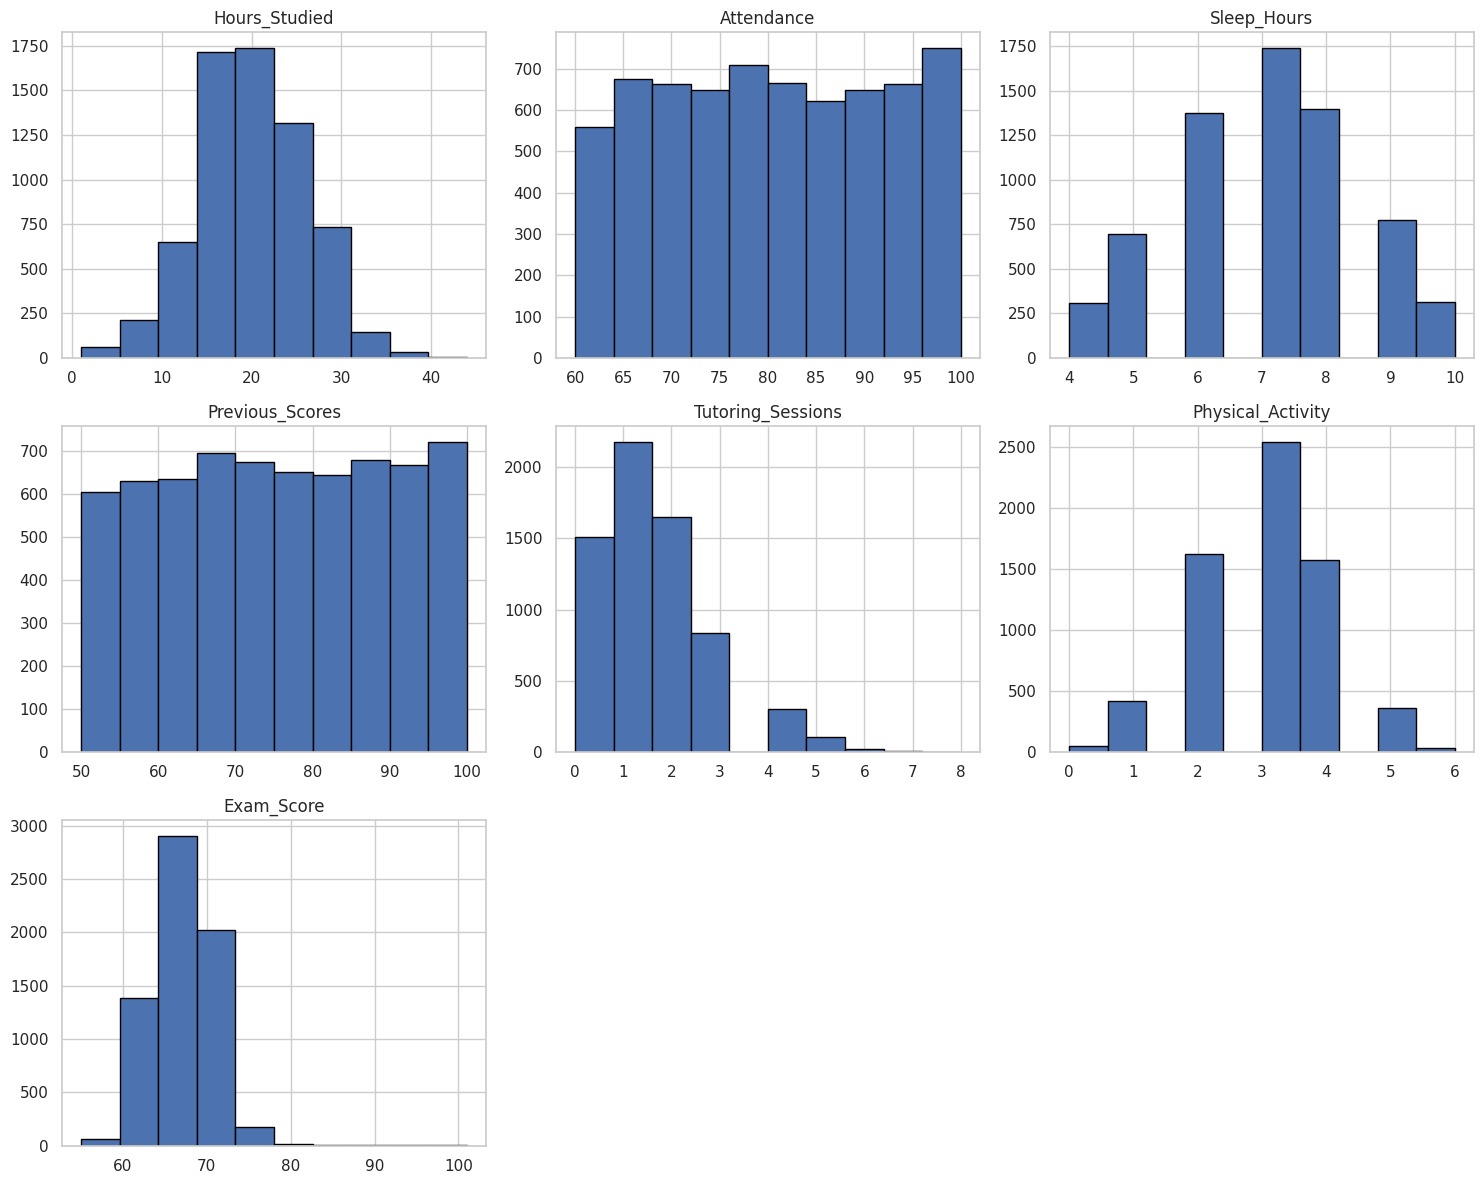

In [32]:
numeric_df.hist(figsize=(15,12), edgecolor='black')
plt.tight_layout()
plt.show()


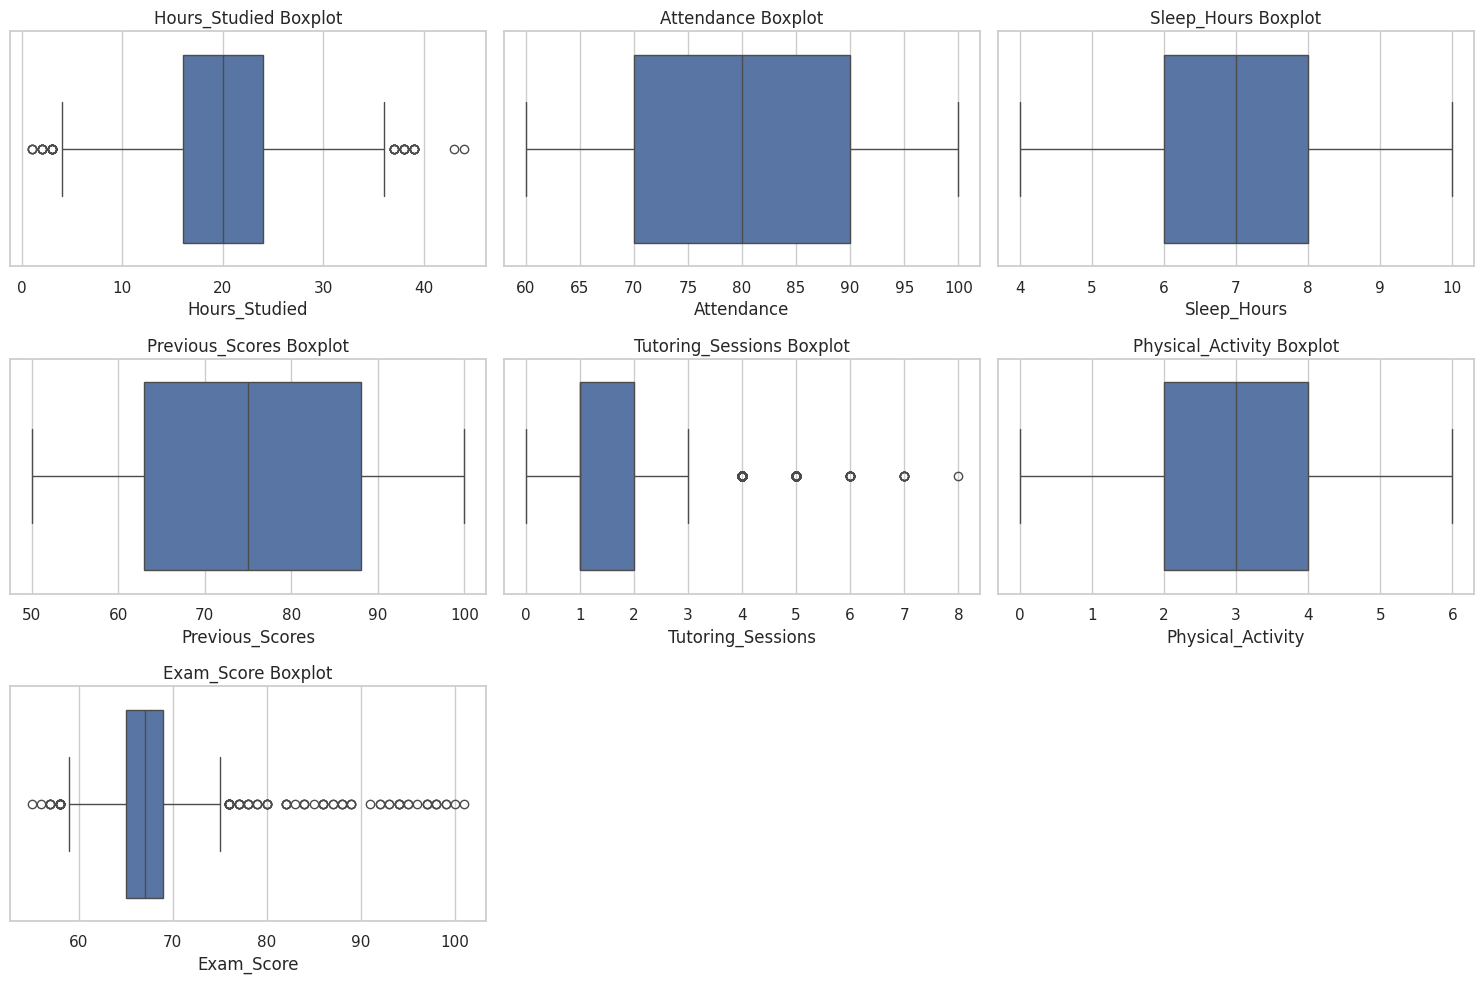

In [33]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=numeric_df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


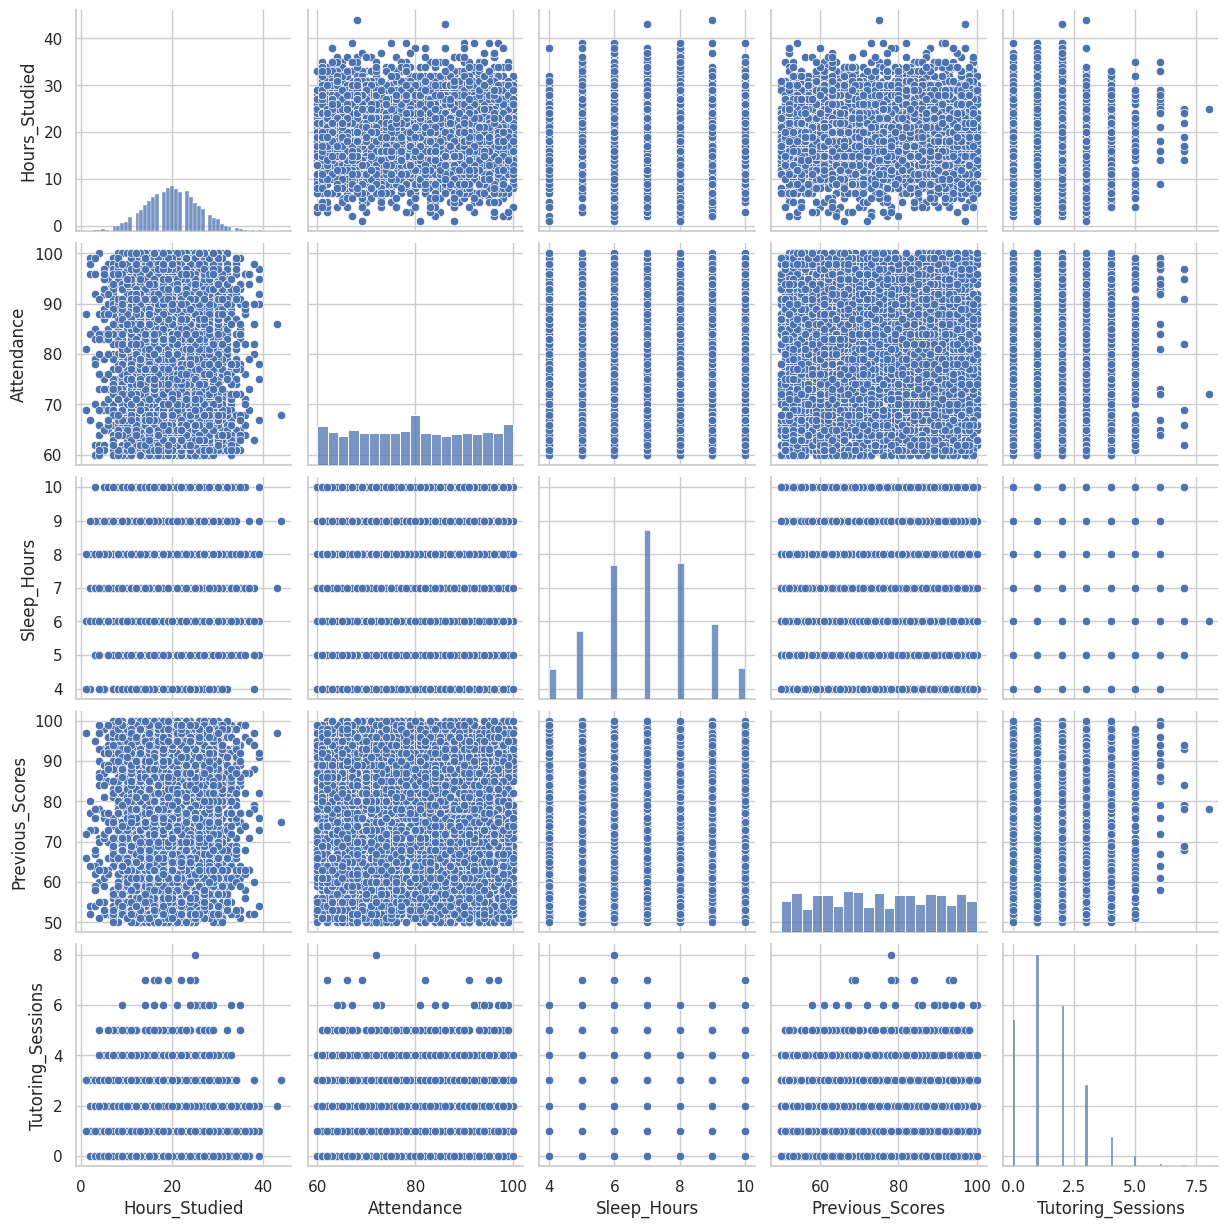

In [34]:
selected_cols = numeric_df.columns[:5]  # First 5 numeric columns
sns.pairplot(numeric_df[selected_cols])
plt.show()


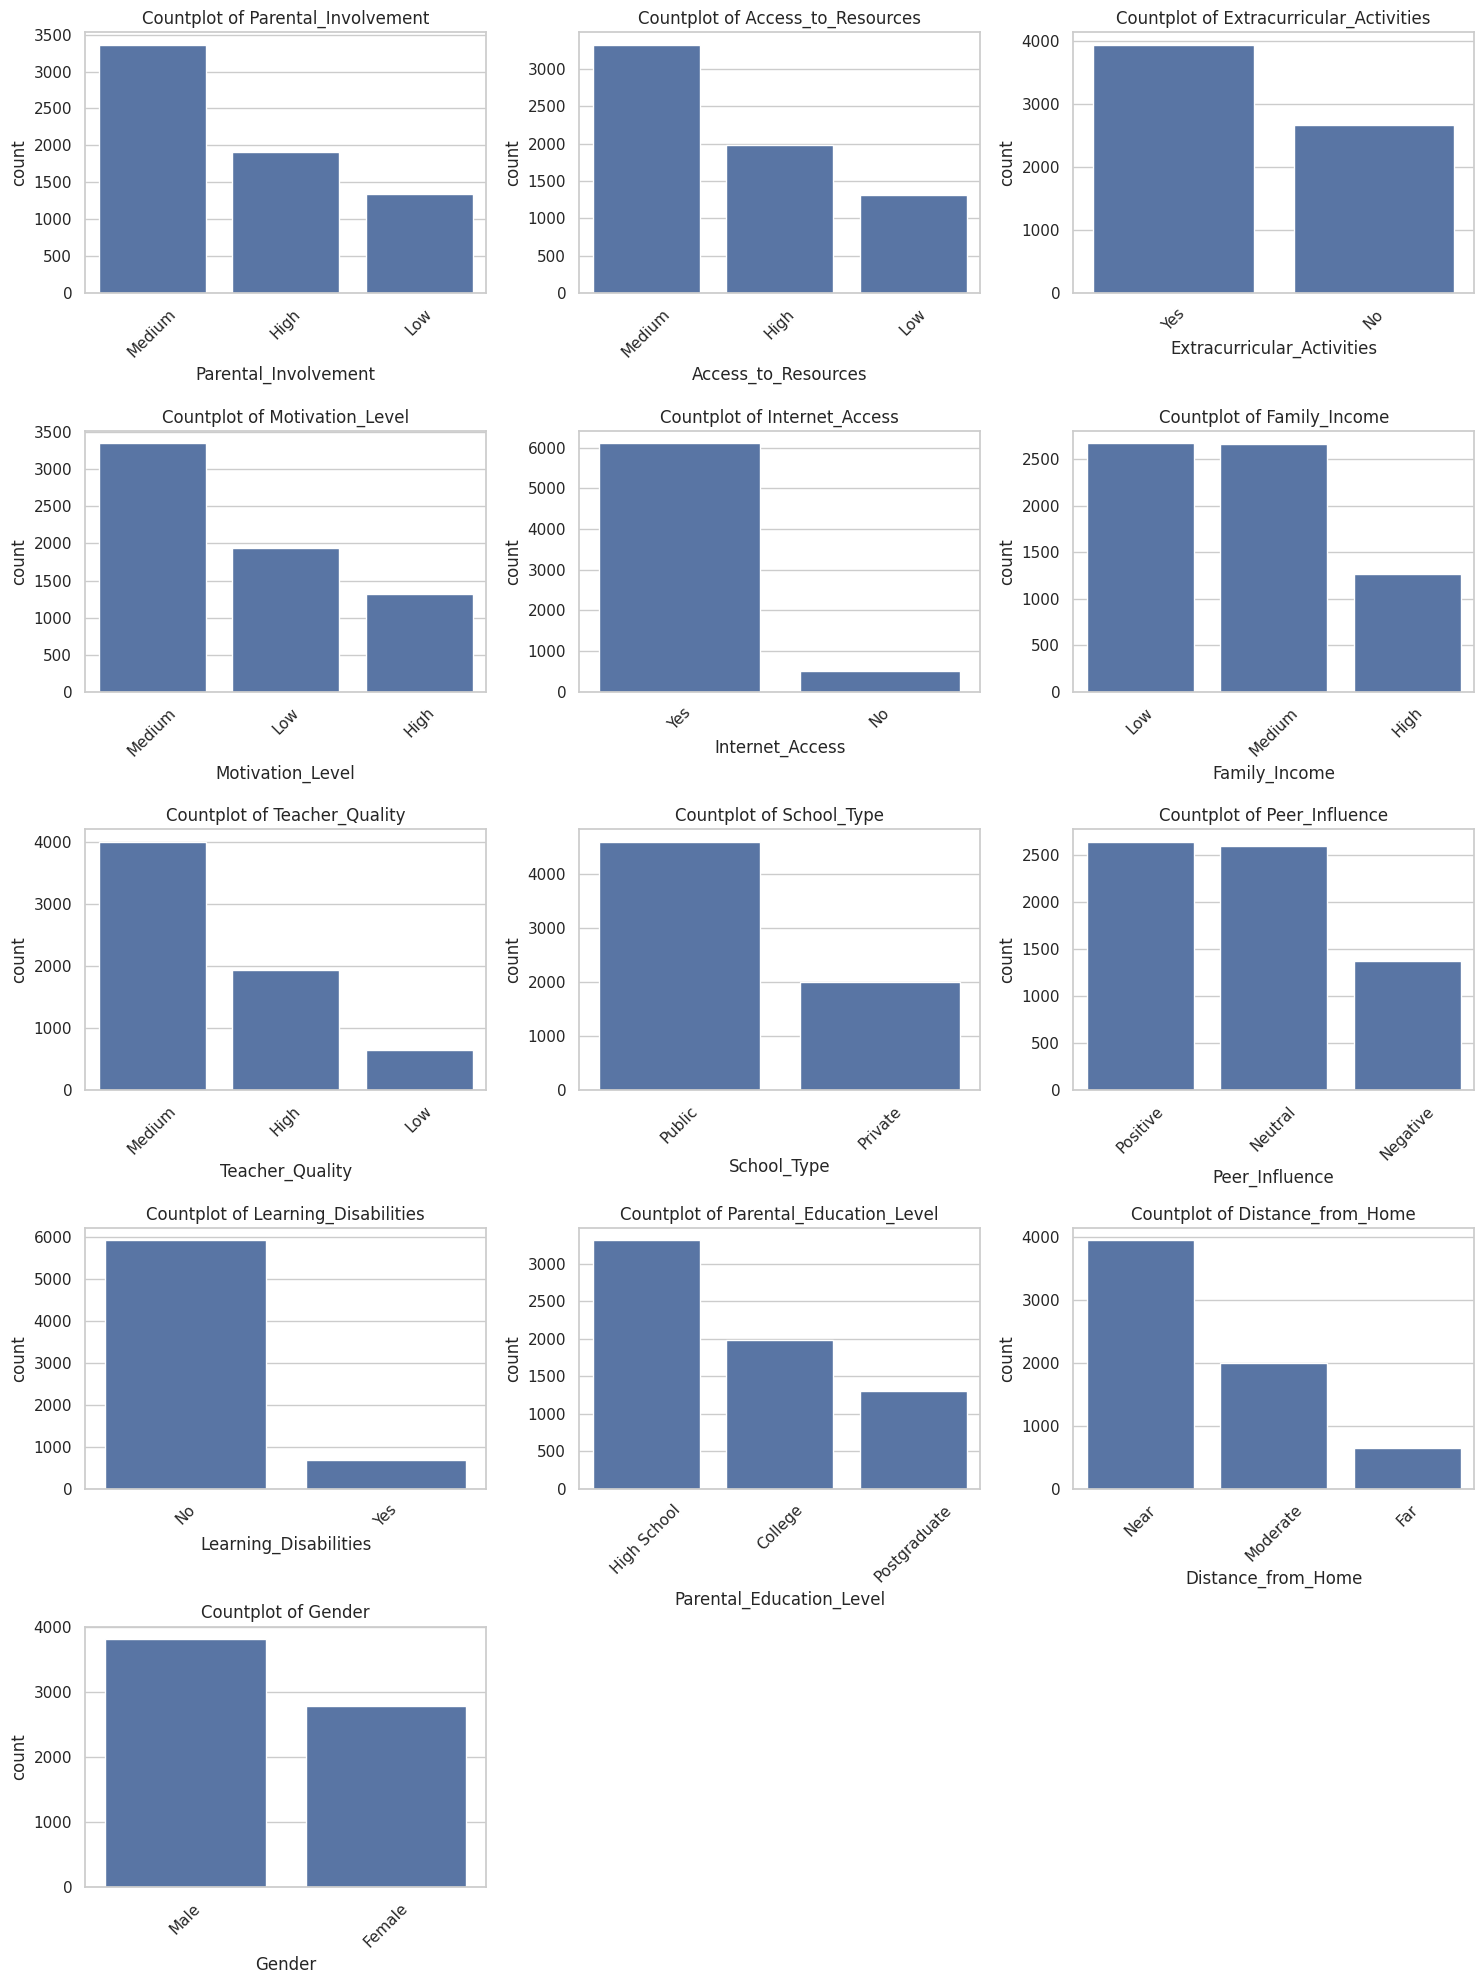

In [35]:
import math
cat_df = df.select_dtypes(include=['object'])

num_cat = len(cat_df.columns)
cols = 3
rows = math.ceil(num_cat / cols)

plt.figure(figsize=(5*cols, 4*rows))
for i, col in enumerate(cat_df.columns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")

plt.tight_layout()
plt.show()


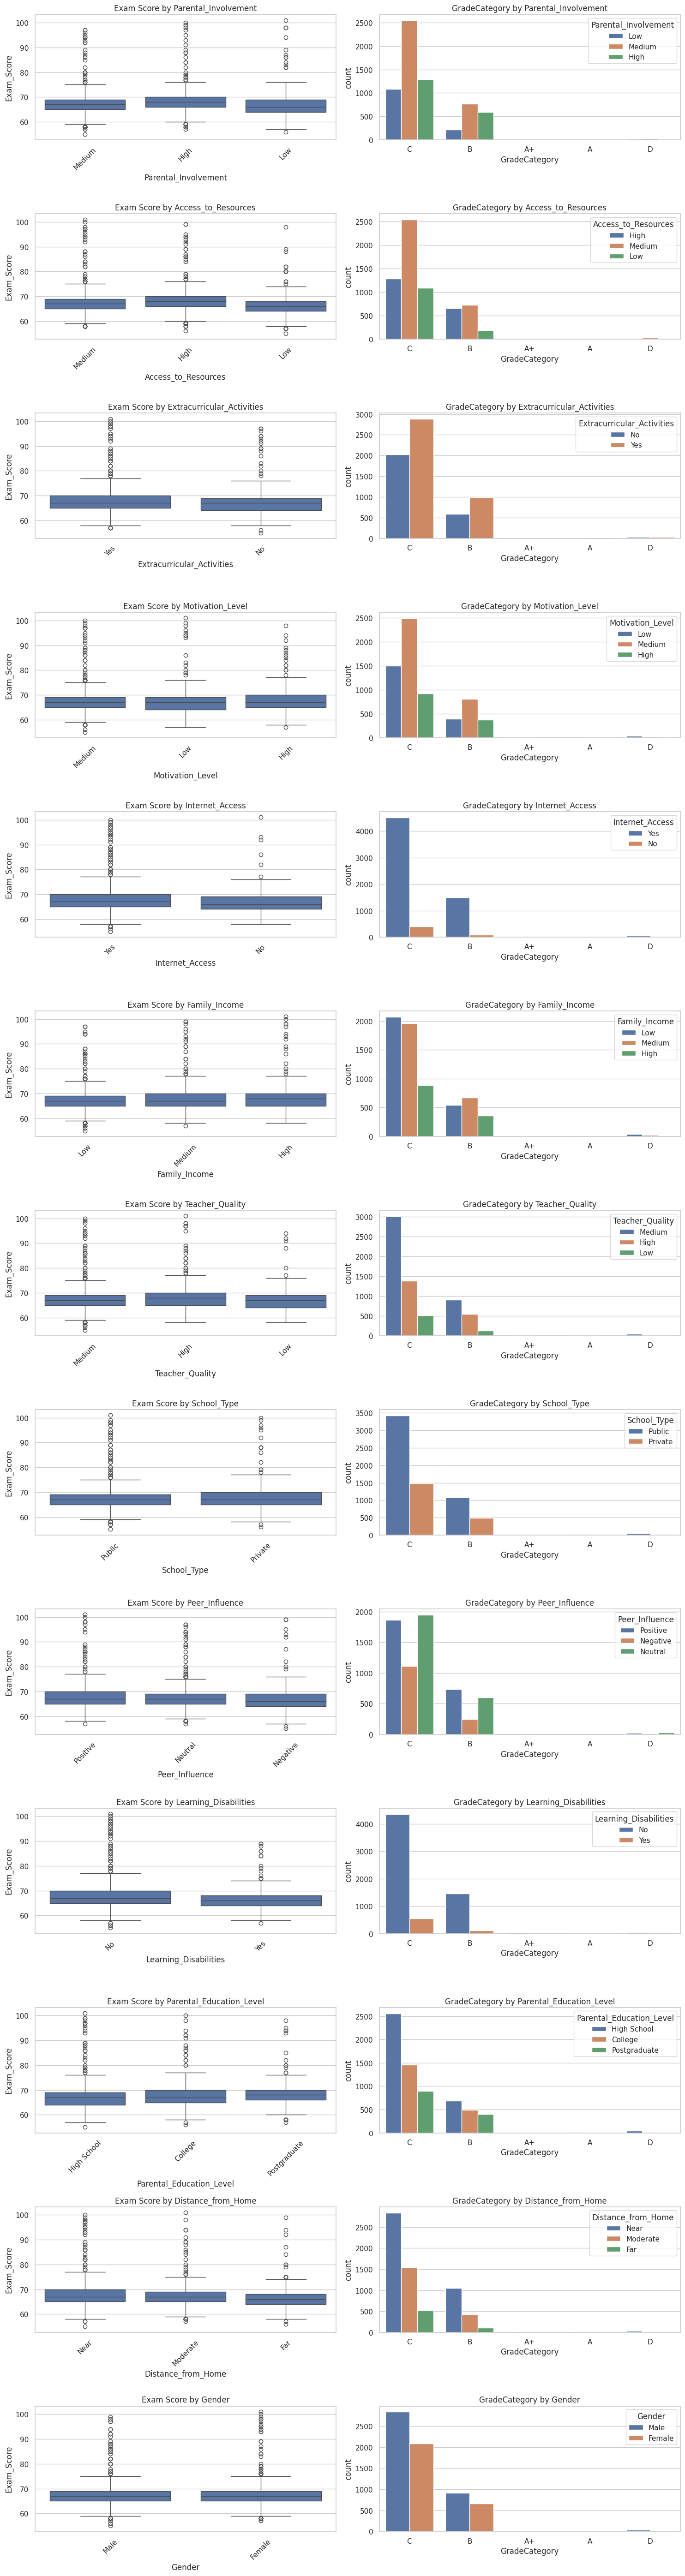

In [37]:
# Create GradeCategory if it doesn't exist
if 'GradeCategory' not in df.columns:
    def score_to_grade(score):
        if score >= 90: return 'A+'
        elif score >= 80: return 'A'
        elif score >= 70: return 'B'
        elif score >= 60: return 'C'
        else: return 'D'
    df['GradeCategory'] = df['Exam_Score'].apply(score_to_grade)

# Now plot categorical features vs target
import math
cat_df = df.select_dtypes(include=['object'])
plt.figure(figsize=(15, 4 * len(cat_df.columns)))

for i, col in enumerate(cat_df.columns):
    # Skip GradeCategory vs itself
    if col == 'GradeCategory':
        continue

    # Exam_Score by category
    plt.subplot(len(cat_df.columns)-1, 2, 2*i + 1)
    sns.boxplot(x=col, y='Exam_Score', data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Exam Score by {col}")

    # GradeCategory by category
    plt.subplot(len(cat_df.columns)-1, 2, 2*i + 2)
    sns.countplot(x='GradeCategory', hue=col, data=df)
    plt.title(f"GradeCategory by {col}")

plt.tight_layout()
plt.show()

